# Vehicle choice prediction

#### **Problem Overview:**

> XYZ Motor Manufactures has collected some data samples from their existing custumers to determine what kind of cars are being purchased by what kind of demogrraphic.

#### **Task:**

> To predict the Choice of Vehicle by building a Machine Learning Model.

In [267]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
#reading the data into python environment and  Making ‘CustomerID’ as the index column
train=pd.read_csv('train.csv',index_col='CustomerID')# train data
test=pd.read_csv('test.csv',index_col='CustomerID')#test data
sam=pd.read_csv('sample_submission.csv',index_col="CustomerID")#sample submission


In [269]:
train.head()#displaying the train data

,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
CustomerID,,,,,,,,,,,,
CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle


In [270]:
train.info()#displaying the information

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, CusID_00000 to CusID_29999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     29561 non-null  float64
 1   Gender                  29583 non-null  object 
 2   City                    29577 non-null  object 
 3   is_Married              29580 non-null  object 
 4   family_size             29586 non-null  float64
 5   height                  29569 non-null  float64
 6   annual_income           29581 non-null  float64
 7   job                     29572 non-null  object 
 8   is_physically_ok        29578 non-null  object 
 9   has_taken_car_loan      29569 non-null  object 
 10  preferable_fuel_choice  29572 non-null  object 
 11  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(8)
memory usage: 3.0+ MB


In [271]:
# finding the unique values in the columns in train data
for i in train.columns:
    print('Unique values in',i, 'are :')
    print(train[i].value_counts())
    print('*'*50)

Unique values in Age are :
31.0    1301
27.0    1276
22.0    1266
33.0    1253
23.0    1237
20.0    1232
32.0    1228
28.0    1220
35.0    1217
34.0    1214
30.0    1211
24.0    1207
26.0    1182
21.0    1171
29.0    1166
25.0    1151
38.0     768
37.0     730
36.0     723
39.0     718
15.0     513
17.0     510
19.0     498
18.0     479
16.0     439
45.0     307
49.0     281
40.0     273
41.0     270
48.0     267
46.0     267
50.0     264
42.0     261
43.0     257
44.0     255
47.0     253
54.0     181
55.0     178
57.0     176
51.0     174
52.0     172
60.0     170
56.0     166
59.0     166
53.0     163
58.0     150
Name: Age, dtype: int64
**************************************************
Unique values in Gender are :
Female           12588
Male             12316
Not_Specified     4675
ZH#C@                1
SA#?I                1
VG?H%                1
TD%Q@                1
Name: Gender, dtype: int64
**************************************************
Unique values in City are :
Bar

In [272]:
# finding the unique values in the columns in test data
for i in test.columns:
    print('Unique values in',i, 'are :')
    print(test[i].value_counts())
    print('*'*50)

Unique values in Age are :
35.0    237
34.0    225
30.0    220
32.0    214
20.0    213
33.0    205
29.0    204
24.0    202
22.0    201
23.0    199
26.0    197
27.0    191
28.0    185
21.0    184
31.0    182
25.0    178
38.0    141
36.0    119
37.0    119
39.0    118
17.0     99
16.0     90
15.0     87
18.0     81
19.0     71
50.0     58
46.0     54
43.0     53
48.0     47
45.0     45
49.0     42
44.0     42
41.0     42
42.0     42
40.0     41
57.0     35
53.0     34
55.0     32
47.0     31
56.0     29
51.0     28
59.0     26
54.0     25
60.0     24
58.0     21
52.0     20
Name: Age, dtype: int64
**************************************************
Unique values in Gender are :
Female           2074
Male             2062
Not_Specified     781
EV%N?               1
N%E#G               1
Name: Gender, dtype: int64
**************************************************
Unique values in City are :
New York City    257
Delhi            251
Toronto          241
Florence         238
Shinjuku        

### Pre-processing

##### Replacing special characters in Gender using NaN

In [273]:
train['Gender'].unique()

array(['Male', 'Female', 'Not_Specified', nan, 'ZH#C@', 'VG?H%', 'SA#?I',
       'TD%Q@'], dtype=object)

In [274]:
train['Gender']=train['Gender'].replace(['ZH#C@', 'VG?H%', 'SA#?I','TD%Q@'],np.NaN)
train['Gender'].value_counts()

Female           12588
Male             12316
Not_Specified     4675
Name: Gender, dtype: int64

In [275]:
test['Gender'].unique()

array(['Female', 'Male', nan, 'Not_Specified', 'EV%N?', 'N%E#G'],
      dtype=object)

In [276]:
test['Gender']=test['Gender'].replace(['EV%N?', 'N%E#G'],np.NaN)
test['Gender'].value_counts()

Female           2074
Male             2062
Not_Specified     781
Name: Gender, dtype: int64

In [277]:
train.columns

Index(['Age', 'Gender', 'City', 'is_Married', 'family_size', 'height',
       'annual_income', 'job', 'is_physically_ok', 'has_taken_car_loan',
       'preferable_fuel_choice', 'vehicle_choice'],
      dtype='object')

##### Replacing special characters in City using NaN

In [278]:
train['City'].unique()

array(['New York City', 'Paris', 'Vancouver', 'Barcelona', 'Los Angeles',
       'Toronto', 'Munich', 'Chennai', 'Florence', 'Budapest', 'Kolkata',
       'San Francisco', 'London', 'Mumbai', 'Taipei', 'Kuala Lampur',
       'Shinjuku', 'Perth', 'Sydney', 'Berlin', 'Vienna', 'Delhi', nan,
       '#VPI@', '#B?TL', '#XY@G', 'P?IX@'], dtype=object)

In [279]:
train['City']=train['City'].replace(['ZH#C@', 'VG?H%', '#VPI@', '#B?TL', '#XY@G', 'P?IX@'],np.NaN)
train['City'].value_counts()

Barcelona        1456
San Francisco    1396
Los Angeles      1384
Budapest         1382
Kolkata          1379
New York City    1369
Berlin           1355
Taipei           1350
Kuala Lampur     1347
Vienna           1346
Munich           1344
Florence         1341
Toronto          1324
Paris            1321
Delhi            1319
Sydney           1316
Chennai          1315
Perth            1308
Mumbai           1308
London           1307
Vancouver        1307
Shinjuku         1299
Name: City, dtype: int64

In [280]:
test['City'].unique()

array(['Delhi', 'Perth', 'Barcelona', 'Kuala Lampur', 'Sydney',
       'Vancouver', 'New York City', 'Kolkata', 'Florence', 'Mumbai',
       'Chennai', 'Toronto', 'Budapest', 'Taipei', 'Vienna',
       'San Francisco', 'Los Angeles', 'Shinjuku', 'London', 'Berlin',
       'Paris', 'Munich', nan, '%?ACE'], dtype=object)

In [281]:
test['City']=test['City'].replace(['%?ACE'],np.NaN)
test['City'].value_counts()

New York City    257
Delhi            251
Toronto          241
Florence         238
Shinjuku         235
Kolkata          232
London           232
Vancouver        227
Munich           223
Mumbai           223
Budapest         220
Taipei           220
Berlin           219
San Francisco    218
Chennai          217
Perth            217
Paris            214
Vienna           214
Sydney           212
Los Angeles      211
Barcelona        207
Kuala Lampur     199
Name: City, dtype: int64

##### Replacing special characters in is_Married using NaN

In [282]:
train['is_Married'].unique()

array(['Divorced', 'Single', 'Married', nan, 'T@JF%', 'ORV@#', '?D@NF',
       'S#TF%', '@XTZ?'], dtype=object)

In [283]:
train['is_Married']=train['is_Married'].replace(['T@JF%', 'ORV@#', '?D@NF', 'S#TF%', '@XTZ?'],np.NaN)
train['is_Married'].value_counts()

Married     13465
Single       8528
Divorced     7582
Name: is_Married, dtype: int64

In [284]:
test['is_Married'].unique()

array(['Married', 'Divorced', 'Single', nan], dtype=object)

##### Replacing special characters in job using NaN

In [285]:
train['job'].unique()

array(['Service', 'Business', 'Student', nan, 'Undisclosed', 'KBN?#',
       'UZT?@', 'Z@B%L', 'TV%?N'], dtype=object)

In [286]:
train['job']=train['job'].replace(['KBN?#', 'UZT?@', 'Z@B%L', 'TV%?N'],np.NaN)
train['job'].value_counts()

Business       14218
Service        11918
Student         2870
Undisclosed      562
Name: job, dtype: int64

In [287]:
test['job'].unique()

array(['Service', 'Business', 'Undisclosed', 'Student', nan], dtype=object)

##### Replacing special characters in is_physically_ok using NaN

In [288]:
train['is_physically_ok'].unique()

array(['Yes', 'No', nan, 'Y%?UH', 'UY%X@'], dtype=object)

In [289]:
train['is_physically_ok']=train['is_physically_ok'].replace(['Y%?UH', 'UY%X@'],np.NaN)
train['is_physically_ok'].value_counts()

Yes    28295
No      1281
Name: is_physically_ok, dtype: int64

In [290]:
test['is_physically_ok'].unique()

array(['Yes', 'No', nan, 'K%#MY'], dtype=object)

In [291]:
test['is_physically_ok']=test['is_physically_ok'].replace(['K%#MY'],np.NaN)
test['is_physically_ok'].value_counts()

Yes    4718
No      215
Name: is_physically_ok, dtype: int64

##### Replacing special characters in has_taken_car_loan using NaN

In [292]:
train['has_taken_car_loan'].unique()

array(['Yes', 'No', nan, '@W%GO', '?N%IY', 'AF?V%'], dtype=object)

In [293]:
train['has_taken_car_loan']=train['has_taken_car_loan'].replace(['@W%GO', '?N%IY', 'AF?V%'],np.NaN)
train['has_taken_car_loan'].value_counts()

No     15444
Yes    14122
Name: has_taken_car_loan, dtype: int64

In [294]:
test['has_taken_car_loan'].unique()

array(['No', nan, 'Yes', 'U#@DX', 'DG?#H'], dtype=object)

In [295]:
test['has_taken_car_loan']=test['has_taken_car_loan'].replace(['U#@DX', 'DG?#H'],np.NaN)
test['has_taken_car_loan'].value_counts()

No     2579
Yes    2358
Name: has_taken_car_loan, dtype: int64

##### Replacing special characters in preferable_fuel_choice using NaN

In [296]:
train['preferable_fuel_choice'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'EV', nan, 'SVY@#', 'IX%K#', '#%KXJ'],
      dtype=object)

In [297]:
train['preferable_fuel_choice']=train['preferable_fuel_choice'].replace(['SVY@#', 'IX%K#', '#%KXJ'],np.NaN)
train['preferable_fuel_choice'].value_counts()

Petrol    12180
Diesel    11187
Hybrid     5107
EV         1095
Name: preferable_fuel_choice, dtype: int64

In [298]:
test['preferable_fuel_choice'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'EV', nan, 'FC?P%'], dtype=object)

In [299]:
test['preferable_fuel_choice']=test['preferable_fuel_choice'].replace(['FC?P%'],np.NaN)
test['preferable_fuel_choice'].value_counts()

Petrol    2010
Diesel    1873
Hybrid     838
EV         195
Name: preferable_fuel_choice, dtype: int64

In [300]:
train.isnull().sum()# checking the null values

Age                       439
Gender                    421
City                      427
is_Married                425
family_size               414
height                    431
annual_income             419
job                       432
is_physically_ok          424
has_taken_car_loan        434
preferable_fuel_choice    431
vehicle_choice              0
dtype: int64

In [301]:
train.dtypes# checking the datatypes

Age                       float64
Gender                     object
City                       object
is_Married                 object
family_size               float64
height                    float64
annual_income             float64
job                        object
is_physically_ok           object
has_taken_car_loan         object
preferable_fuel_choice     object
vehicle_choice             object
dtype: object

In [302]:
train.columns

Index(['Age', 'Gender', 'City', 'is_Married', 'family_size', 'height',
       'annual_income', 'job', 'is_physically_ok', 'has_taken_car_loan',
       'preferable_fuel_choice', 'vehicle_choice'],
      dtype='object')

### Filling the null values

In [303]:
# grouping categorical variables together
categorical_columns = [ 'Gender', 'City', 'is_Married', 'job', 'is_physically_ok', 'has_taken_car_loan',
                       'preferable_fuel_choice']
#finding the mode
for column in categorical_columns:
    print('Mode of',column, 'is:')
    print(train[column].mode())
    
   

Mode of Gender is:
0    Female
dtype: object
Mode of City is:
0    Barcelona
dtype: object
Mode of is_Married is:
0    Married
dtype: object
Mode of job is:
0    Business
dtype: object
Mode of is_physically_ok is:
0    Yes
dtype: object
Mode of has_taken_car_loan is:
0    No
dtype: object
Mode of preferable_fuel_choice is:
0    Petrol
dtype: object


#### Replacing the NaN values of categorical variables with mode.

In [304]:
train['Gender'] =train['Gender'].fillna('Female')
test['Gender'] =test['Gender'].fillna('Female')
#train

In [305]:
train['City'] =train['City'].fillna('Barcelona')
test['City'] =test['City'].fillna('Barcelona')

In [306]:
train['is_Married'] =train['is_Married'].fillna('Married')
test['is_Married'] =test['is_Married'].fillna('Married')

In [307]:
train['job'] =train['job'].fillna('Business')
test['job'] =test['job'].fillna('Business')

In [308]:
train['is_physically_ok'] =train['is_physically_ok'].fillna('Yes')
test['is_physically_ok'] =test['is_physically_ok'].fillna('Yes')

In [309]:
train['has_taken_car_loan'] =train['has_taken_car_loan'].fillna('No')
test['has_taken_car_loan'] =test['has_taken_car_loan'].fillna('No')

In [310]:
train['preferable_fuel_choice'] =train['preferable_fuel_choice'].fillna('Petrol')
test['preferable_fuel_choice'] =test['preferable_fuel_choice'].fillna('Petrol')

In [311]:
# grouping numerical variables together
numerical_columns=['Age', 'family_size', 'height','annual_income']

# replacing the null values with median
for column in numerical_columns:
    train[column] =train[column].replace(np.NaN,train[column].median())
    test[column] =test[column].replace(np.NaN,test[column].median())
train

,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
CustomerID,,,,,,,,,,,,
CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...
CusID_29995,24.0,Female,Vienna,Divorced,3.0,155.0,91320.0,Business,Yes,No,Petrol,Sedan
CusID_29996,32.0,Female,Shinjuku,Married,5.0,163.0,133210.0,Business,Yes,No,Diesel,Sports Utility Vehicle
CusID_29997,24.0,Female,San Francisco,Single,1.0,152.0,87300.0,Service,Yes,No,Petrol,Luxury Sedan


#### Handling the outliers

In [312]:
#Finding the 25th percentile and 75th percentiles.
Q1 = train.quantile(0.25)             
Q3 = train.quantile(0.75)

 #Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1                          

#Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_limit=Q1-1.5*IQR                        
upper_limit=Q3+1.5*IQR

#Finding the sum of the outliers in each column of int and float types.
((train.select_dtypes(include=['float64','int64'])<lower_limit) | (train.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

Age              1006
family_size         0
height              0
annual_income     263
dtype: int64

Text(0.5, 1.0, 'Box plot  of Age  (before handling outliers)')

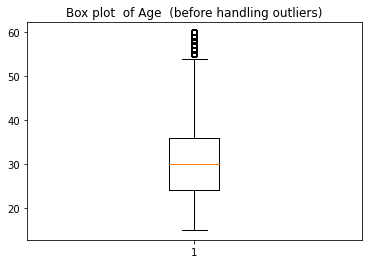

In [313]:
plt.boxplot(train['Age'])
plt.title('Box plot  of Age  (before handling outliers)')

Text(0.5, 1.0, 'Box plot  of annual_income  (before handling outliers)')

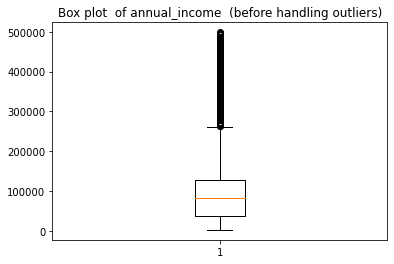

In [314]:
plt.boxplot(train['annual_income'])
plt.title('Box plot  of annual_income  (before handling outliers)')

-Outliers are retained as they are not unwanted values.  

In [318]:
# Performing label encoding to the categorical variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender', 'City', 'is_Married', 'job', 'is_physically_ok', 'has_taken_car_loan',
                       'preferable_fuel_choice']
for column in categorical_columns:
    train[column] = le.fit_transform(train[column])
    test[column] = le.fit_transform(test[column])

In [319]:
# Performing label encoding to the target variable.
train['vehicle_choice'] = le.fit_transform(train['vehicle_choice'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)# displaying the encoded values

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17}


## Standardisation

In [321]:
#standardisation of train data
from sklearn.preprocessing import StandardScaler
col_names = ['Age', 'height', 'annual_income']
features = train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
train[col_names] = features


In [322]:
#standardisation of test data
col_names = ['Age', 'height', 'annual_income']
features = test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
test[col_names] = features

In [323]:
train

,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
CustomerID,,,,,,,,,,,,
CusID_00000,0.510168,1,12,0,2.0,0.630076,-0.868589,1,1,1,2,10
CusID_00001,-1.625675,0,12,2,1.0,-0.902086,-1.252849,1,1,1,3,1
CusID_00002,2.442598,1,13,1,2.0,1.351094,1.122276,1,1,0,3,12
CusID_00003,-0.812020,1,20,0,3.0,1.080712,0.935777,0,1,0,0,14
CusID_00004,-0.812020,2,20,2,1.0,-0.541577,-0.770868,1,1,1,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...
CusID_29995,-0.710314,0,21,0,3.0,0.179440,0.110612,0,1,0,3,10
CusID_29996,0.103341,0,16,1,5.0,0.900458,0.804433,0,1,0,0,13
CusID_29997,-0.710314,0,15,2,1.0,-0.090941,0.044029,1,1,0,3,7


### Modelling

In [324]:
# Assigning input and target varible for modelling
X=train.drop(['vehicle_choice'],axis=1)
y=train['vehicle_choice']

In [325]:
y.shape

(30000,)

In [326]:
#importing train_test_split from the scikit-learn library
from sklearn.model_selection import train_test_split

# we have to split the data into training and testing parts 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#### 1.Logistic Regression

In [330]:
#importing  Logistic regression from the scikit-learn library 
from sklearn.linear_model import LogisticRegression


# create instance of the model and storing it to variable logit_model
logit_model = LogisticRegression()

# fit this into xtrain and y train to create the model
logit_model.fit(X_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
y_pred_log = logit_model.predict(X_test)


C:\Users\DELNA.RAPHEL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [328]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [331]:
print('The Performance of Logistic regression is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred_log) )# we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred_log,average='weighted'))
print('Recall is:', recall_score(y_test,y_pred_log,average='weighted'))
print('f1_score is:',f1_score(y_test,y_pred_log,average='weighted'))

The Performance of Logistic regression is:

Accuracy is: 0.3745
Precesion is: 0.3566807371627536
Recall is: 0.3745
f1_score is: 0.35363864279555524


### 2. KNN classifier

In [335]:
#importing KNN classifier  from the scikit-learn library
from sklearn.neighbors import KNeighborsClassifier # KNN classifier 

KNN_model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
KNN_model.fit(X_train, y_train)
y_pred_KNN = KNN_model.predict(X_test)

In [336]:
print('The Performance of KNN is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred_KNN) )# we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred_KNN,average='weighted'))
print('Recall is:', recall_score(y_test,y_pred_KNN,average='weighted'))
print('f1_score is:',f1_score(y_test,y_pred_KNN,average='weighted'))

The Performance of KNN is:

Accuracy is: 0.6003333333333334
Precesion is: 0.6075716114304035
Recall is: 0.6003333333333334
f1_score is: 0.596896483874698


### 3. Decision Tree

In [350]:
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier algorithm

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred_DT = DT_model.predict(X_test)

In [351]:
print('The Performance of DT is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred_DT) )# we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred_DT,average='weighted'))
print('Recall is:', recall_score(y_test,y_pred_DT,average='weighted'))
print('f1_score is:',f1_score(y_test,y_pred_DT,average='weighted'))

The Performance of DT is:

Accuracy is: 0.9158333333333334
Precesion is: 0.9170068161154429
Recall is: 0.9158333333333334
f1_score is: 0.9162575018246569


### 3. Random Forest

In [337]:
#Import Random Forest Model from sklearn
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_RF=clf.predict(X_test)


In [354]:
print('The Performance of RF is:\n')
print('Accuracy is:',accuracy_score(y_test,y_pred_RF) )# we have to compare y test with y predictions
print('Precesion is:',precision_score(y_test,y_pred_RF,average='weighted'))
print('Recall is:', recall_score(y_test,y_pred_RF,average='weighted'))
print('f1_score is:',f1_score(y_test,y_pred_RF,average='weighted'))

The Performance of RF is:

Accuracy is: 0.9486666666666667
Precesion is: 0.9514582156282916
Recall is: 0.9486666666666667
f1_score is: 0.9495625771401548


##### -The Maximum accuracy is obtained for Random Forest Classifier.Hence , selected for the prediction of output

### Prediction of output

In [340]:
#Assingning test data to X_input
X_input=test
y_final=clf.predict(X_input)

In [359]:
y_final # displayong the output in encoded form

array([13,  7, 17, ..., 13,  7,  1], dtype=int64)

In [360]:
y_final.to_csv('Submission1.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [344]:
SUBMISSION=pd.DataFrame(y_final,index=test.index)#creating a dataframe with output

SUBMISSION.columns =['vehicle_choice']# column as vehicle_choice

#Reassigning the categorical names to the output.
SUBMISSION['vehicle_choice'].replace({ 0:'Compact Sedan',1: 'Compact Utility Vehicle',
                                      2:'Convertible', 3:'Coupe',4: 'Crossover', 
                                      5:'Hatchback',6: 'Luxury Coupe', 7:'Luxury Sedan',
                                      8:'Minivan', 9:'Pickup-Truck', 10:'Sedan', 
                                      11:'Sports Coupe', 12:'Sports Sedan', 13:'Sports Utility Vehicle',
                                      14:'Sportscar', 15:'Station Wagon',
                                      16: 'Utility Vehicle',17:'Utility vehicle'},inplace=True)
SUBMISSION.to_csv('Submission.csv')#submission file

In [259]:
SUBMISSION #output

,vehicle_choice
CustomerID,
CusID_30000,Sports Utility Vehicle
CusID_30001,Luxury Sedan
CusID_30002,Utility vehicle
CusID_30003,Luxury Coupe
CusID_30004,Hatchback
...,...
CusID_34995,Station Wagon
CusID_34996,Sports Sedan
CusID_34997,Sports Utility Vehicle


In [353]:
round(4.576)

5

In [358]:
SUBMISSION.columns

Index(['vehicle_choice'], dtype='object')